# Apple Stock Exploration

In [48]:
import warnings
warnings.filterwarnings('ignore')

from datetime import date
import math

import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [49]:
START = '2015-01-01'
END = date.today().strftime("%Y-%m-%d")

<h4>Load Apple stock data into a dataframe

In [50]:
df_AAPL = web.DataReader('AAPL', data_source='yahoo', start=START, end=END)

<h4>Exploring dataset

In [51]:
df_AAPL.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,99.766006
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,96.955429
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,96.964584


In [52]:
df_AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1425.000000,1425.000000,1425.000000,1425.000000,1.425000e+03,1425.000000
mean,176.942014,173.500288,175.146400,175.329179,3.667739e+07,169.864782
std,74.801191,72.794471,73.685739,73.957860,1.807515e+07,76.092239
min,91.669998,89.470001,90.000000,90.339996,1.136200e+07,84.809998
25%,118.410004,116.750000,117.629997,117.650002,2.445120e+07,110.236122
50%,160.000000,157.509995,158.990005,158.630005,3.216540e+07,153.347336
75%,205.339996,202.199997,203.460007,203.860001,4.406680e+07,200.668991
max,515.140015,500.329987,514.789978,506.089996,1.622063e+08,506.089996


<h4>Plot the timeserie

<IPython.core.display.Javascript object>


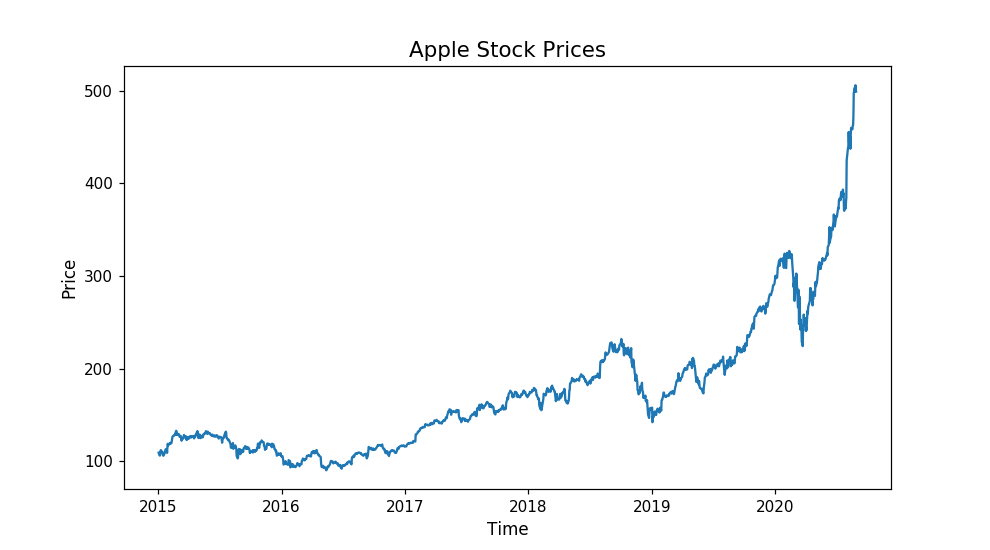

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
ax.plot(df_AAPL['Close'])
plt.title('Apple Stock Prices', fontsize=14)
plt.xlabel('Time', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.show()

<h3>Show annual growth

In [54]:
def increment(x0, x1):
    return ((x1-x0)/x0)*100

In [55]:
def growthData(df_input):
    last_price = []
    growth = []
    for year in range(2015, 2021):
        close_price = df_input[df_input.index.year == year].tail(1)['Close'][0]
        last_price.append(close_price)
        if year != 2015:
            inc = increment(last_price[-2], last_price[-1])
            growth.append([year, inc])
    growth_df = pd.DataFrame(growth, columns=['year', 'growth'])
    growth_df.set_index('year', inplace=True)
    return growth_df

In [56]:
annual_growth = growthData(df_AAPL)
annual_growth

,growth
year,
2016,10.032298
2017,46.114657
2018,-6.789571
2019,86.160761
2020,70.008521


<IPython.core.display.Javascript object>


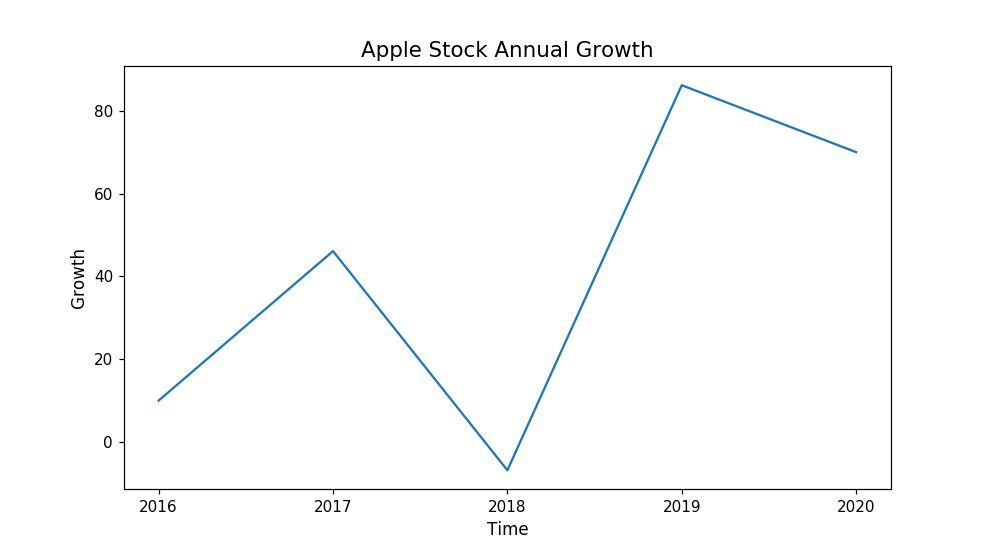

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
ax.plot(annual_growth)
plt.title('Apple Stock Annual Growth', fontsize=14)
plt.xlabel('Time', fontsize=11)
plt.ylabel('Growth', fontsize=11)
plt.xticks([2016,2017,2018,2019,2020])
plt.show()